Practica 3 
Parte 1 -  Análisis estadístico en señales ECG

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy import stats

Implemente una función que permita calcular el valor cuadrático medio (RMS) de una señal.

In [4]:
def RMS(N,x):
    """
    Calcula el valor cuadrático medio (RMS) de una señal dada.
    
    Parámetros:
    N (int): Número de muestras en la señal (longitud de la lista `x`).
    x (list or array-like): Lista o array que contiene los valores de la señal.

    Retorna:
    float: El valor RMS de la señal.
    """ 
    c=0 # Inicializa el contador para la sumatoria

    # Itera a través de cada valor en la señal, hasta N
    for i in range(N+1):
        rms=x[i]**2
        c=c+rms
    # Calcula el valor RMS: raíz cuadrada de la media de los cuadrados
    xrms=((1/N)*c)**(1/2)

    return RMS # Devuelve el valor RMS calculado

Leer los datos

In [9]:
# Cargar el archivo .mat
data = scipy.io.loadmat('signals.mat')

# Iterar sobre cada llave en el diccionario y mostrar el número de datos
for key in data:
    # Omitir llaves internas que empiezan con '__'
    if not key.startswith('__'):
        # Obtener la forma (shape) del array asociado a la llave
        shape = data[key].shape
        num_elements = data[key].size  # Número de elementos totales
        print(f"{key}, Dimensiones: {shape}, Número de elementos: {num_elements}")

Fs, Dimensiones: (1, 1), Número de elementos: 1
ECG_asRecording, Dimensiones: (1, 30720), Número de elementos: 30720
ECG_filtered, Dimensiones: (1, 30720), Número de elementos: 30720
EMG_filtered1, Dimensiones: (1, 30721), Número de elementos: 30721
EMG_filtered2, Dimensiones: (1, 30721), Número de elementos: 30721
EMG_asRecording1, Dimensiones: (1, 30721), Número de elementos: 30721
EMG_asRecording2, Dimensiones: (1, 30721), Número de elementos: 30721


•	A partir de la información suministrada en el archivo .mat, determine el tiempo de duración de las señales, cree un vector de tiempo. 

In [15]:
# Frecuencia de muestreo
Fs=data['Fs'][0][0]

# Número de muestras en la señal 
N=np.shape(data['ECG_asRecording'])[1] 

# Vector de tiempo
t=np.linspace(0,(N/Fs),N)

# Asegurar que el vector de tiempo tenga el mismo número de elementos que la señal
if t.shape[0] > N:
    t = t[:N]

print(t.shape)

(30720,)


•	Grafique la señal sin filtrar y filtrada, compárelas. Comente lo que observa, y describa cómo debe ser el comportamiento del filtro que se utilizó. Recuerde las frecuencias de interés de la señal ECG.

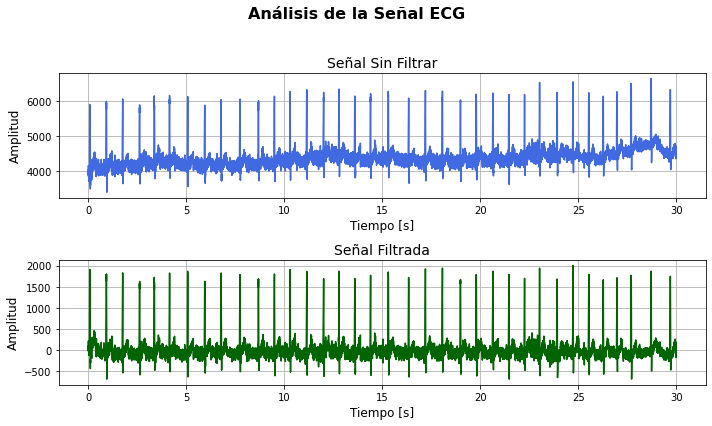

In [18]:
# Configuraciones globales de la gráfica
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.suptitle('Análisis de la Señal ECG', fontsize=16, fontweight='bold')  # Título global

# Primera subgráfica: Señal sin filtrar
plt.subplot(211)
plt.plot(t, data['ECG_asRecording'][0], color='royalblue', linestyle='-', linewidth=1.5)
plt.title('Señal Sin Filtrar', fontsize=14)
plt.xlabel('Tiempo [s]', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.grid(True)  # Añadir cuadrícula para mejor visualización

# Segunda subgráfica: Señal filtrada
plt.subplot(212)
plt.plot(t, data['ECG_filtered'][0], color='darkgreen', linestyle='-', linewidth=1.5)
plt.title('Señal Filtrada', fontsize=14)
plt.xlabel('Tiempo [s]', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.grid(True)  # Añadir cuadrícula para mejor visualización

# Ajustar el espacio entre subgráficas para evitar superposiciones
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste adicional para no superponer con el título global
plt.show()

Análisis
La señal sin filtrar muestra un comportamiento típico de un registro de ECG, con alta variabilidad en las amplitudes, incluyendo picos agudos que corresponden a los complejos QRS. Existe una variación considerable en la línea de base, lo que indica la presencia de ruido de baja frecuencia, probablemente debido a interferencias de la línea de alimentación o al movimiento del paciente. Además, se observan componentes de alta frecuencia que podrían estar relacionados con artefactos electromiográficos o ruido eléctrico. Después de aplicar el filtro, la señal evidencia una reducción significativa en la variabilidad de la línea de base, lo que indica que el filtro ha sido eficaz en la eliminación del ruido de baja frecuencia. Los picos correspondientes a los complejos QRS se mantienen claramente visibles. La reducción de los componentes de alta frecuencia también es evidente, lo que indica que el filtro ha sido eficaz en atenuar el ruido de alta frecuencia, mejorando la calidad del registro sin eliminar las características fisiológicas esenciales de la señal.

•	Tome la señal tal cual se registró. De dicha señal, seleccione un ciclo cardiaco, grafique. Calcule el promedio, el valor RMS, la varianza y la desviación estándar del ciclo. Analice los resultados.

•	Tome la señal filtrada. Repita el procedimiento anterior con esta señal, compare con los resultados obtenidos en el ítem anterior. 

•	Extraiga 15 ciclos de la señal filtrada, y para cada ciclo calcule el valor promedio y la varianza, grafique cada ciclo, y analice (gráfica y estadísticamente). ¿Se puede considerar que la señal es estacionaria? 

•	Realice dos veces comparaciones entre dos ciclos cualquiera utilizando una prueba t. Determine estadísticamente si existe diferencia estadística entre los ciclos, Compruebe los supuestos necesarios para realizar una prueba t, esto es: Normalidad de la variable, independencia (se asume que los grupos son independientes), y homocedasticidad (use una prueba de Levene), finalmente realice la prueba t para determinar si existen diferencias entre los ciclos. Qué indica este análisis respecto de la estacionariedad, explique. De no cumplirse los requisitos, realice entonces un análisis no paramétrico (prueba U de Mann-Whitney).

•	Compruebe los resultados anteriores aplicando una prueba de Dickey-Fuller a la señal (Estacionariedad) 